# TEST

In [26]:
import os
from datetime import datetime
import json
import requests
from dotenv import load_dotenv
import pandas as pd
from matplotlib import pyplot as plt

In [27]:
load_dotenv()


True

In [28]:
month_val = "2021-03"
symbol = "AAPL"



In [29]:
def parse_json():
    api_key = os.getenv("API_KEY")
    function = "TIME_SERIES_INTRADAY"
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=60min&outputsize=full&month={month_val}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    return data

In [30]:
print(parse_json())

{'Meta Data': {'1. Information': 'Intraday (60min) open, high, low, close prices and volume', '2. Symbol': 'AAPL', '3. Last Refreshed': '2021-03-31 19:00:00', '4. Interval': '60min', '5. Output Size': 'Full size', '6. Time Zone': 'US/Eastern'}, 'Time Series (60min)': {'2021-03-31 19:00:00': {'1. open': '119.3104', '2. high': '119.5057', '3. low': '119.2031', '4. close': '119.5057', '5. volume': '90858'}, '2021-03-31 18:00:00': {'1. open': '119.1446', '2. high': '119.3105', '3. low': '119.1348', '4. close': '119.3007', '5. volume': '63984'}, '2021-03-31 17:00:00': {'1. open': '119.0763', '2. high': '119.1641', '3. low': '119.0665', '4. close': '119.1543', '5. volume': '56967'}, '2021-03-31 16:00:00': {'1. open': '119.2324', '2. high': '119.9261', '3. low': '118.9689', '4. close': '119.0665', '5. volume': '16246851'}, '2021-03-31 15:00:00': {'1. open': '119.8277', '2. high': '119.9253', '3. low': '119.0665', '4. close': '119.2324', '5. volume': '18608268'}, '2021-03-31 14:00:00': {'1. op

In [31]:
def get_df(data):
    # Access the time series data directly from the nested dictionary
    time_series_data = data['Time Series (60min)']
    # Convert the nested dictionary to DataFrame
    df = pd.DataFrame.from_dict(time_series_data, orient='index')
    return df

In [32]:
print(get_df(parse_json()))

                      1. open   2. high    3. low  4. close 5. volume
2021-03-31 19:00:00  119.3104  119.5057  119.2031  119.5057     90858
2021-03-31 18:00:00  119.1446  119.3105  119.1348  119.3007     63984
2021-03-31 17:00:00  119.0763  119.1641  119.0665  119.1543     56967
2021-03-31 16:00:00  119.2324  119.9261  118.9689  119.0665  16246851
2021-03-31 15:00:00  119.8277  119.9253  119.0665  119.2324  18608268
...                       ...       ...       ...       ...       ...
2021-03-01 08:00:00  120.6183  120.7256  118.6400  120.6768    640257
2021-03-01 07:00:00  120.6280  120.7842  120.2084  120.5500    416949
2021-03-01 06:00:00  121.0184  121.1746  120.4621  120.6573     77949
2021-03-01 05:00:00  121.1258  121.3502  120.9208  121.0184     68405
2021-03-01 04:00:00  121.3112  121.6040  120.7256  121.1941     95794

[368 rows x 5 columns]


In [33]:
def create_json():
    a_raw = parse_json()
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    file_name = "output" + symbol + month_val + ".json"
    file_path = os.path.join('data', file_name)
    with open(file_path , "w") as json_file:
        json.dump(a_raw, json_file, indent=4)

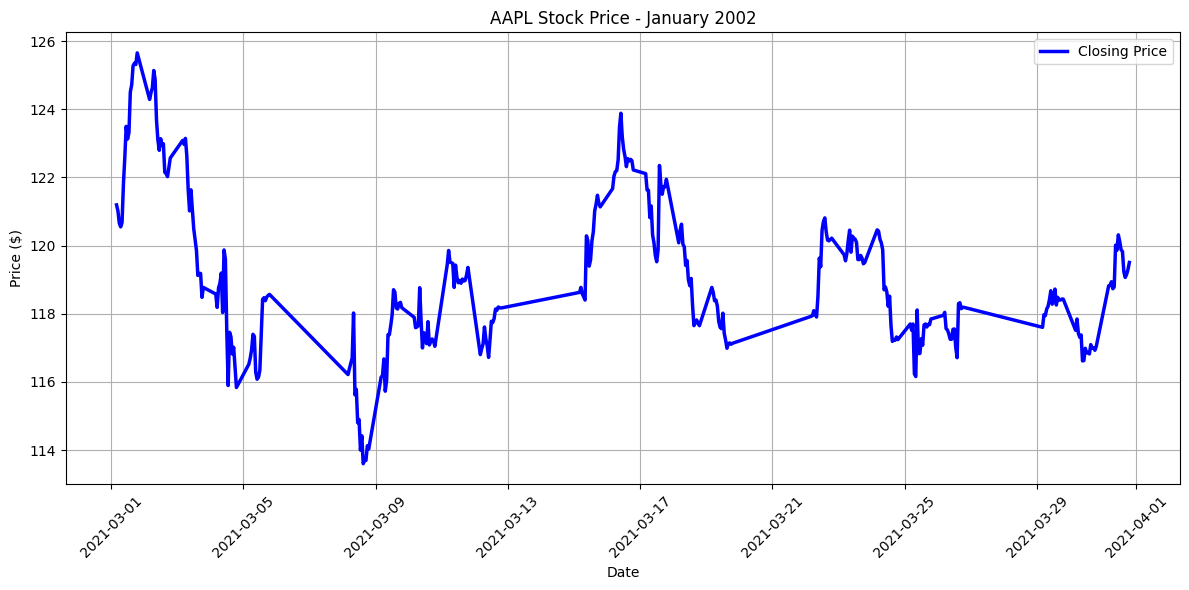

In [34]:
def plot_json():
    file_path = 'data/output' + symbol + month_val + '.json'
    if os.path.exists(file_path):
        with open(file_path) as json_file:
            data = json.load(json_file)
    else:
        create_json()
    with open('data/output' + symbol + month_val + '.json') as json_file:
        json_data = json.load(json_file)
    time_series = json_data['Time Series (60min)']
    dates = list(time_series.keys())
    closing_prices = [float(time_series[date]['4. close']) for date in dates]
    #opening_prices = [float(time_series[date]['1. open']) for date in dates]

    dates = [pd.to_datetime(date) for date in dates]

    plt.figure(figsize=(12, 6))
    plt.plot(dates, closing_prices, color='blue', label='Closing Price', linestyle='-', linewidth=2.5)
    #plt.plot(dates, opening_prices, linestyle='--', color='green', label='Opening Price')
    plt.title(symbol + ' Stock Price - January 2002')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45)
    plt.legend(
        ['Closing Price'],
        loc='upper right'
    )
   # plt.legend(['Opening Price'], loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_json()